# Lab 1

Your Name Goes Here: **Zya Woodfork**

The date goes here: **March 2, 2025**

In [324]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.integrate import quad

### Part 1
---

In [325]:
M = 5.9*10**24 # kg
xM = 0 # m
yM = 0 # m
x = np.linspace(0, 1.5*3.8e8, 100) # m
y = 0 #np.linspace(0, 1.5*3.8e8, 100) # m

G = 6.67*10**(-11) # m^3/kg/s^2

In [326]:
def potential(G, M, xM, yM, x, y):
    r = np.sqrt((x-xM)**2 + (y-yM)**2)
    return -(G*M)/r

I = np.where(x<6378137, np.nan, potential(G, M, xM, yM, x, y))
#print(f"Potential = {I} J/kg")

/var/folders/nw/jsrx3nf105q8sbvdnnd3ydrw0000gn/T/ipykernel_51105/119813094.py:3: RuntimeWarning: divide by zero encountered in divide
  return -(G*M)/r


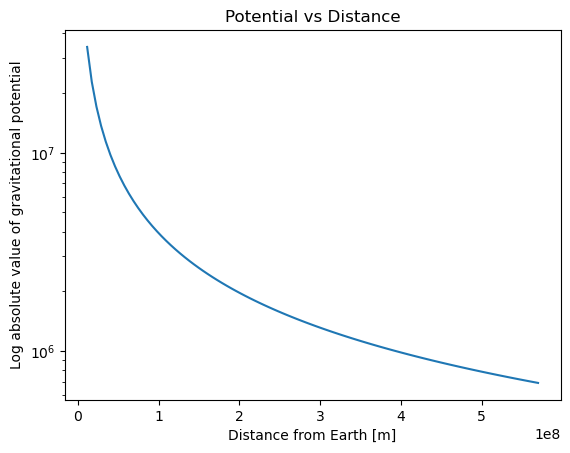

In [327]:
fig1, ax1 = plt.subplots(1,1)

ax1.plot(x,abs(I))

ax1.set_yscale("log")
ax1.set_xlabel("Distance from Earth [m]")
ax1.set_ylabel("Log absolute value of gravitational potential")
ax1.set_title("Potential vs Distance")

plt.savefig("Lab1_fig1.png")

In [328]:
M = 5.9e24 # kg
xM = 0 # m
yM = 0 # m
x = np.linspace(-1.5*3.8e8, 1.5*3.8e8, 1000) # m
y = np.linspace(-1.5*3.8e8, 1.5*3.8e8, 1000) # m

x_grid, y_grid = np.meshgrid(x,y)

I = abs(potential(G, M, xM, yM, x_grid, y_grid))

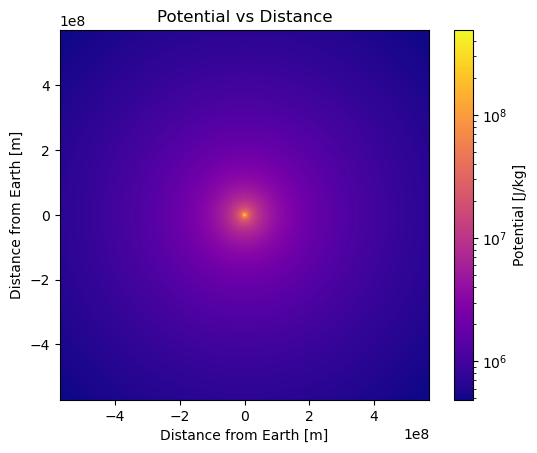

In [329]:
fig2, ax2 = plt.subplots(1,1)
mesh = ax2.pcolormesh(x_grid, y_grid, I, cmap=cm.plasma, norm="log")

ax2.set_aspect("equal")
ax2.set_xlabel("Distance from Earth [m]")
ax2.set_ylabel("Distance from Earth [m]")
ax2.set_title("Potential vs Distance")

cbar = fig2.colorbar(mesh)
cbar.set_label("Potential [J/kg]")

plt.savefig("Lab1_fig2.png")

### Part 2
---

In [330]:
xe = 0 # m
ye = 0 # m

xm = (3.8e8)/np.sqrt(2) # m
ym = (3.8e8)/np.sqrt(2) # m


x = np.linspace(-1.5*3.8e8, 1.5*3.8e8, 1000)
y = np.linspace(-1.5*3.8e8, 1.5*3.8e8, 1000)

x_grid, y_grid = np.meshgrid(x,y)

Me = 5.9e24
Mm = 7.3e22

Ie = abs(potential(G, Me, xe, ye, x_grid, y_grid))

Im = abs(potential(G, Mm, xm, ym, x_grid, y_grid))

Itot = Im + Ie

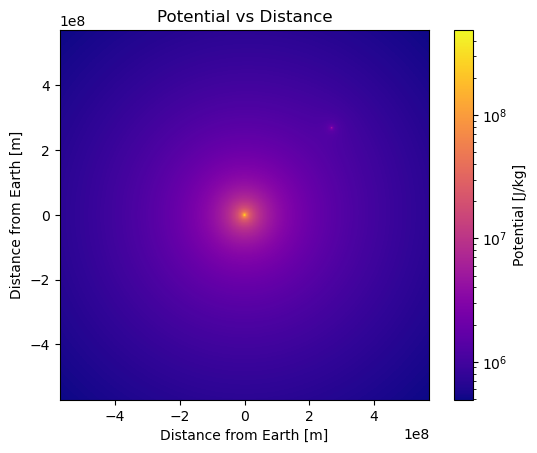

In [331]:
fig3, ax3 = plt.subplots(1,1)
mesh_earth = ax3.pcolormesh(x_grid, y_grid, Itot, cmap=cm.plasma, norm="log")

ax3.set_aspect("equal")
ax3.set_xlabel("Distance from Earth [m]")
ax3.set_ylabel("Distance from Earth [m]")
ax3.set_title("Potential vs Distance")

cbar = fig3.colorbar(mesh_earth)
cbar.set_label("Potential [J/kg]")

plt.savefig("Lab1_fig3.png")

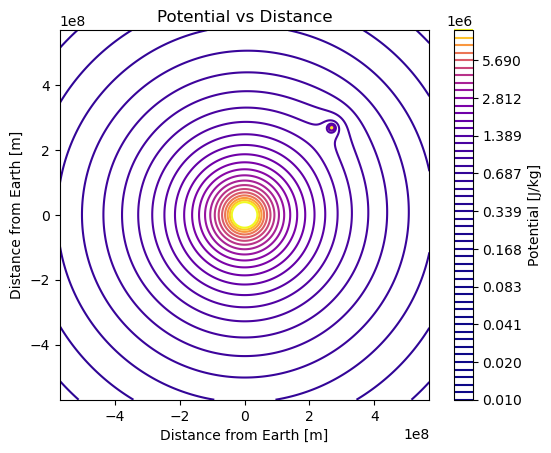

In [332]:
fig4, ax4 = plt.subplots(1,1)

lvl = np.logspace(4, 7, 50)
contour = ax4.contour(x_grid, y_grid, Itot, cmap=cm.plasma, levels=lvl)
ax4.set_aspect("equal")

ax4.set_xlabel("Distance from Earth [m]")
ax4.set_ylabel("Distance from Earth [m]")
ax4.set_title("Potential vs Distance")

cbar = fig4.colorbar(contour)
cbar.set_label("Potential [J/kg]")

plt.savefig("Lab1_fig4.png")

### Part 3
---

In [333]:
M_earth = 5.9e24 # kg
m_moon = 7.3e22 # kg
m_module = 5500 # kg
xe = 0 # m
ye = 0 # m
xm = (3.8e8)/np.sqrt(2) # m
ym = (3.8e8)/np.sqrt(2) # m

G = 6.67*10**(-11) # m^3/kg/s^2


In [334]:
def grav_force(G, M1, m2, x1, y1, x2, y2):
    r21 = np.sqrt((x2-x1)**2 + (y2-y1)**2)
    rx = x2-x1
    ry = y2-y1
    r_hatx = rx / r21
    r_haty = ry / r21
    Fx = np.where(np.isclose(r_hatx, np.inf) is True, np.nan, (-G*(M1*m2) / (r21**2)) * r_hatx )
    Fy = np.where(np.isclose(r_haty, np.inf) is True, np.nan, (-G*(M1*m2) / (r21**2)) * r_haty )
    return Fx, Fy
    
Fx_earth = grav_force(G, M_earth, m_module, xe, ye, x_grid, y_grid)[0]
Fy_earth = grav_force(G, M_earth, m_module, xe, ye, x_grid, y_grid)[1]
Fx_moon = grav_force(G, m_moon, m_module, xm, ym, x_grid, y_grid)[0]
Fy_moon = grav_force(G, m_moon, m_module, xm, ym, x_grid, y_grid)[1]


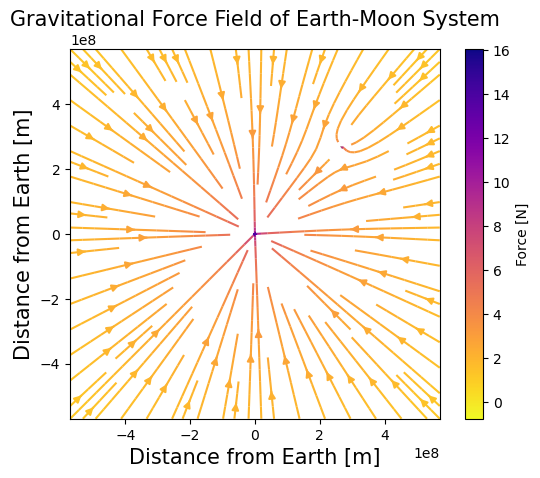

In [335]:
fig5, ax5 = plt.subplots()

#ax5.streamplot(x_grid, y_grid, Fx_earth+Fx_moon, Fy_earth+Fy_moon)


colors = np.log(np.sqrt((Fx_earth+Fx_moon)**2 + (Fy_earth+Fy_moon)**2))
stream = ax5.streamplot(x_grid, y_grid, Fx_earth+Fx_moon, Fy_earth+Fy_moon, color=colors, cmap=cm.plasma_r)
cbar = fig5.colorbar(stream.lines, label="Force [N]", norm="log")
ax5.set_aspect("equal")


ax5.set_ylabel("Distance from Earth [m]", fontsize=15)
ax5.set_xlabel("Distance from Earth [m]", fontsize=15)
ax5.set_title("Gravitational Force Field of Earth-Moon System", fontsize=15)

plt.savefig("Lab1_fig5.png")

### Part 4
---

In [321]:
m0 = 2.8e6 #kg
mf = 7.5e5 #kg
dm = 1.3e4 #kg/s

T = (m0 - mf) / (dm) #s
print(f"T = {T} seconds")

T = 157.69230769230768 seconds


In [322]:
ve = 2.4e3 #m/s
g = 9.81 #m/s^2
t = np.linspace(0, T, 100)

def velocity_func(t, m0, mf, dm, ve, g):
    m_of_t = m0-dm*t
    m_of_t = np.where(m_of_t < mf, mf, m_of_t)
    return ve * np.log(m0/(m_of_t)) - g*t
    


In [323]:
h, h_err = quad(velocity_func, 0, T, args=(m0, mf, dm, ve, g))
print(f"altitude at end of burn = {h} +/- {h_err}m")


altitude at end of burn = 74093.98013366401 +/- 5.848811185394151e-08m
